# TD - Clustering

Ce répertoire contient les fichiers et solutions pour le TD Clustering.

**Fait par : CHICA Miller et TORRES Jonathan**

## 1. Clustering k-means

### Exercice 1

In [20]:
from typing import List, Optional
import math, random
from copy import deepcopy

# Définition d'un type pour représenter un point (liste de coordonnées numériques)
Point = List[float]

# Fonction pour calculer la distance euclidienne au carré entre deux points
def euclidean_sq(p: Point, q: Point) -> float:
    return sum((pi - qi) ** 2 for pi, qi in zip(p, q))

# Fonction pour calculer le centre (moyenne) d’un ensemble de points
def mean_point(points: List[Point]) -> Point:
    dim = len(points[0])
    return [sum(p[d] for p in points) / len(points) for d in range(dim)]

# Implémentation de l’algorithme k-means
def kmeans(
    data: List[Point],            # Jeu de données : liste de points
    k: int,                       # Nombre de clusters
    init_centroids: Optional[List[Point]] = None,  # Centroïdes initiaux (optionnel)
    max_iter: int = 100,          # Nombre maximal d’itérations
    tol: float = 0.0,             # Tolérance sur le déplacement des centroïdes
    seed: Optional[int] = None,   # Graine aléatoire (pour la reproductibilité)
    verbose: bool = True          # Si True, affiche les itérations
) -> float:
    # Vérifie que le jeu de données n’est pas vide
    if not data:
        if verbose:
            print("Fin clustering, erreur = 0.0")
        return 0.0

    n = len(data)
    if k <= 0 or k > n:
        raise ValueError("k doit être compris entre 1 et len(data)")

    # Vérifie que tous les points ont la même dimension
    dim = len(data[0])
    for p in data:
        if len(p) != dim:
            raise ValueError("Tous les points doivent avoir la même dimension")

    # Initialisation aléatoire des centroïdes si aucun n’est fourni
    rng = random.Random(seed)
    if init_centroids is None:
        centroids = [deepcopy(p) for p in rng.sample(data, k)]
    else:
        if len(init_centroids) != k:
            raise ValueError("init_centroids doit contenir exactement k centroïdes")
        centroids = [list(map(float, c)) for c in init_centroids]

    # Tableau pour mémoriser les affectations (cluster de chaque point)
    assignments = [-1] * n

    # Boucle principale : assignation et mise à jour
    for it in range(1, max_iter + 1):
        changed = False
        clusters = [[] for _ in range(k)]

        # Étape d’assignation : chaque point est affecté au centroïde le plus proche
        for i, p in enumerate(data):
            dists = [euclidean_sq(p, c) for c in centroids]
            j = min(range(k), key=lambda idx: dists[idx])
            if assignments[i] != j:
                changed = True
                assignments[i] = j
            clusters[j].append(p)

        # Affichage de l’état actuel (si verbose=True)
        if verbose:
            print(f"Iteration {it}")
            for j in range(k):
                c_str = "[" + ", ".join(f"{x:.10g}" for x in centroids[j]) + "]"
                print(f"Centroid {c_str} Points {clusters[j]}")

        # Étape de mise à jour : recalcul des centroïdes comme moyennes des clusters
        new_centroids = deepcopy(centroids)
        for j in range(k):
            if clusters[j]:
                new_centroids[j] = mean_point(clusters[j])
            else:
                # Si un cluster est vide, on conserve l’ancien centroïde
                new_centroids[j] = centroids[j]

        # Calcul du déplacement maximal des centroïdes
        max_move = max(
            math.sqrt(euclidean_sq(old, new))
            for old, new in zip(centroids, new_centroids)
        )
        centroids = new_centroids

        # Condition d’arrêt : aucune affectation ne change ou déplacement < tol
        if not changed or max_move <= tol:
            break

    # Calcul de l’erreur finale (SSE : somme des distances au carré)
    sse = 0.0
    for p, j in zip(data, assignments):
        sse += euclidean_sq(p, centroids[j])

    # Affichage du résultat final
    if verbose:
        print(f"Fin clustering, erreur = {sse}")
    return sse



In [21]:
# === Tests avec le jeu de données de l’énoncé ===
data1 = [[1], [2], [18], [20], [31]]

print("=== Init [[1],[2],[18]] ===")
kmeans(data1, k=3, init_centroids=[[1], [2], [18]], tol=0.0, verbose=True)

print("\n=== Init [[18],[20],[31]] ===")
kmeans(data1, k=3, init_centroids=[[18], [20], [31]], tol=0.0, verbose=True)

=== Init [[1],[2],[18]] ===
Iteration 1
Centroid [1] Points [[1]]
Centroid [2] Points [[2]]
Centroid [18] Points [[18], [20], [31]]
Iteration 2
Centroid [1] Points [[1]]
Centroid [2] Points [[2]]
Centroid [23] Points [[18], [20], [31]]
Fin clustering, erreur = 98.0

=== Init [[18],[20],[31]] ===
Iteration 1
Centroid [18] Points [[1], [2], [18]]
Centroid [20] Points [[20]]
Centroid [31] Points [[31]]
Iteration 2
Centroid [7] Points [[1], [2]]
Centroid [20] Points [[18], [20]]
Centroid [31] Points [[31]]
Iteration 3
Centroid [1.5] Points [[1], [2]]
Centroid [19] Points [[18], [20]]
Centroid [31] Points [[31]]
Fin clustering, erreur = 2.5


2.5

### Exercice 2

In [22]:
# Jeu de données 1D pour le test (Exercice 2)
data2 = [[2], [4], [6], [12], [24], [30]]

print("=== (a) Centroides initiaux [[2], [6]] ===")
sse_a = kmeans(data2, k=2, init_centroids=[[2], [6]], tol=0.0, verbose=True)

print("\n=== (b) Centroides initiaux [[12], [24]] ===")
sse_b = kmeans(data2, k=2, init_centroids=[[12], [24]], tol=0.0, verbose=True)

# Affichage des erreurs finales pour le compte rendu
print("\n--- Récapitulatif ---")
print(f"SSE (a) init [[2],[6]]  = {sse_a}")
print(f"SSE (b) init [[12],[24]] = {sse_b}")

=== (a) Centroides initiaux [[2], [6]] ===
Iteration 1
Centroid [2] Points [[2], [4]]
Centroid [6] Points [[6], [12], [24], [30]]
Iteration 2
Centroid [3] Points [[2], [4], [6]]
Centroid [18] Points [[12], [24], [30]]
Iteration 3
Centroid [4] Points [[2], [4], [6], [12]]
Centroid [22] Points [[24], [30]]
Iteration 4
Centroid [6] Points [[2], [4], [6], [12]]
Centroid [27] Points [[24], [30]]
Fin clustering, erreur = 74.0

=== (b) Centroides initiaux [[12], [24]] ===
Iteration 1
Centroid [12] Points [[2], [4], [6], [12]]
Centroid [24] Points [[24], [30]]
Iteration 2
Centroid [6] Points [[2], [4], [6], [12]]
Centroid [27] Points [[24], [30]]
Fin clustering, erreur = 74.0

--- Récapitulatif ---
SSE (a) init [[2],[6]]  = 74.0
SSE (b) init [[12],[24]] = 74.0


---
Pour le jeu de données 1D **[[2], [4], [6], [12], [24], [30]]**, deux configurations de centroïdes initiaux ont été testées :

* (a) **[[2], [6]]**

* (b) **[[12], [24]]**

Dans les deux cas, l’algorithme converge vers le même résultat :
les points **[2], [4], [6], [12]** forment le premier cluster (centre ≈ 6),
les points **[24], [30]** le second **(centre ≈ 27)**,
avec une SSE = **74.0**.

Les deux initialisations donnent donc la même qualité de clustering,
mais la configuration (b) converge plus rapidement car ses centroïdes initiaux sont plus proches de la solution optimale.

---

### Exercice 3

In [23]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [24]:
from typing import List, Optional, Tuple, Dict
import math, random
from copy import deepcopy
import matplotlib.pyplot as plt

# =============================
#   1) K-means avec "history"
# =============================

Point = List[float]

def euclidean_sq(p: Point, q: Point) -> float:
    """Distance euclidienne au carré (pas de racine, plus rapide et suffisant pour argmin / SSE)."""
    return sum((pi - qi) ** 2 for pi, qi in zip(p, q))

def mean_point(points: List[Point]) -> Point:
    """Moyenne composante par composante."""
    dim = len(points[0])
    return [sum(p[d] for p in points) / len(points) for d in range(dim)]

def kmeans_with_history(
    data: List[Point],
    k: int,
    init_centroids: Optional[List[Point]] = None,
    max_iter: int = 100,
    tol: float = 0.0,
    seed: Optional[int] = None,
    verbose: bool = True
) -> Tuple[float, List[Dict]]:
    """
    K-means (points R^d) + enregistrement de l'historique.
    Retourne (SSE finale, history), où history est une liste d'états par itération :
      {"centroids": [[...], ...], "clusters": List[List[Point]], "assignments": List[int]}
    """
    if not data:
        if verbose:
            print("Fin clustering, erreur = 0.0")
        return 0.0, []

    n = len(data)
    if k <= 0 or k > n:
        raise ValueError("k doit être compris entre 1 et len(data)")

    dim = len(data[0])
    for p in data:
        if len(p) != dim:
            raise ValueError("Tous les points doivent avoir la même dimension")

    rng = random.Random(seed)
    if init_centroids is None:
        centroids = [deepcopy(p) for p in rng.sample(data, k)]
    else:
        if len(init_centroids) != k:
            raise ValueError("init_centroids doit contenir exactement k centroïdes")
        centroids = [list(map(float, c)) for c in init_centroids]

    assignments = [-1] * n
    history = []

    for it in range(1, max_iter + 1):
        changed = False
        clusters = [[] for _ in range(k)]

        # Étape d’assignation
        for i, p in enumerate(data):
            dists = [euclidean_sq(p, c) for c in centroids]
            j = min(range(k), key=lambda idx: dists[idx])
            if assignments[i] != j:
                changed = True
                assignments[i] = j
            clusters[j].append(p)

        # Sauvegarde de l'état courant
        history.append({
            "centroids": deepcopy(centroids),
            "clusters": deepcopy(clusters),
            "assignments": assignments[:],
        })

        # Affichage (comme dans l’énoncé)
        if verbose:
            print(f"Iteration {it}")
            for j in range(k):
                c_str = "[" + ", ".join(f"{x:.10g}" for x in centroids[j]) + "]"
                print(f"Centroid {c_str} Points {clusters[j]}")

        # Étape de mise à jour
        new_centroids = deepcopy(centroids)
        for j in range(k):
            if clusters[j]:
                new_centroids[j] = mean_point(clusters[j])
            else:
                new_centroids[j] = centroids[j]

        # Critère d’arrêt
        max_move = max(
            math.sqrt(euclidean_sq(old, new))
            for old, new in zip(centroids, new_centroids)
        )
        centroids = new_centroids
        if not changed or max_move <= tol:
            break

    # SSE finale
    sse = 0.0
    for p, j in zip(data, assignments):
        sse += euclidean_sq(p, centroids[j])

    if verbose:
        print(f"Fin clustering, erreur = {sse}")

    return sse, history


# ======================================
#   2) Visualisation 2D par itérations
# ======================================

def plot_sequence_2d(
    data: List[Point],
    names: List[str],
    history: List[Dict],
    title_prefix: str = "",
    xlim: Tuple[float, float] = (-3, 3),
    ylim: Tuple[float, float] = (-3, 3),
    show_axes_zero: bool = True
):
    """
    Génére une figure par itération :
    - Points (•) en 2D, étiquetés avec leurs noms.
    - Centroïdes (×) avec la même couleur que leurs clusters.
    - Même cluster => même couleur.
    """
    # Palette simple (bleu, rouge, vert, violet, orange, etc.)
    palette = ["tab:blue", "tab:red", "tab:green", "tab:purple", "tab:orange", "tab:brown"]

    for t, state in enumerate(history, start=1):
        centroids = state["centroids"]
        assignments = state["assignments"]
        k = len(centroids)

        plt.figure(figsize=(4.5, 4.5))

        # Axes + croix à (0,0) pour rappeler l’origine (comme l’illustration du sujet)
        if show_axes_zero:
            plt.axhline(0, linewidth=1, color="#87CEFA")
            plt.axvline(0, linewidth=1, color="#87CEFA")

        # Tracer les points par cluster
        for j in range(k):
            color = palette[j % len(palette)]
            # Points appartenant au cluster j
            xs = [p[0] for p, a in zip(data, assignments) if a == j]
            ys = [p[1] for p, a in zip(data, assignments) if a == j]
            labels = [nm for nm, a in zip(names, assignments) if a == j]

            plt.scatter(xs, ys, s=45, color=color)  # points (•)
            # Annotation des points
            for x, y, lab in zip(xs, ys, labels):
                plt.text(x + 0.05, y + 0.05, lab, fontsize=10, color=color)

            # Centroïde du cluster j (×)
            cx, cy = centroids[j]
            plt.scatter([cx], [cy], marker="x", s=100, linewidths=2.0, color=color)

        plt.xlim(*xlim)
        plt.ylim(*ylim)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(f"{title_prefix} - Iteration {t}")
        plt.tight_layout()
        # Pour enregistrer :
        # plt.savefig(f"{title_prefix.replace(' ', '_').lower()}_{t:02d}.png", dpi=150)
        plt.show()






=== Cas A : init M1 et M2 ===
Iteration 1
Centroid [-2, 3] Points [[-2, 3]]
Centroid [-2, 1] Points [[-2, 1], [-2, -1], [2, -1], [2, 1], [1, 0]]
Iteration 2
Centroid [-2, 3] Points [[-2, 3], [-2, 1]]
Centroid [0.2, 0] Points [[-2, -1], [2, -1], [2, 1], [1, 0]]
Iteration 3
Centroid [-2, 2] Points [[-2, 3], [-2, 1]]
Centroid [0.75, -0.25] Points [[-2, -1], [2, -1], [2, 1], [1, 0]]
Fin clustering, erreur = 15.5


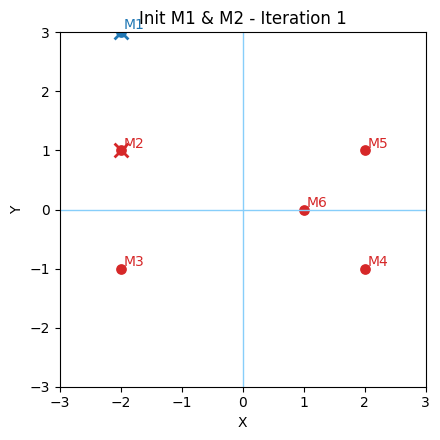

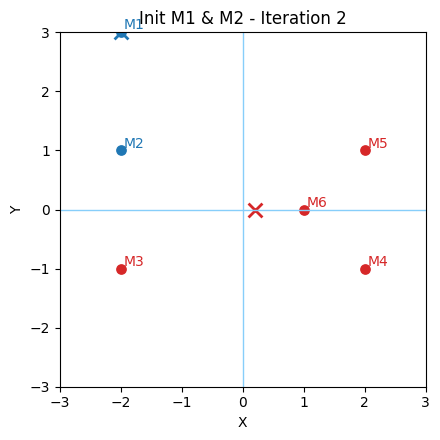

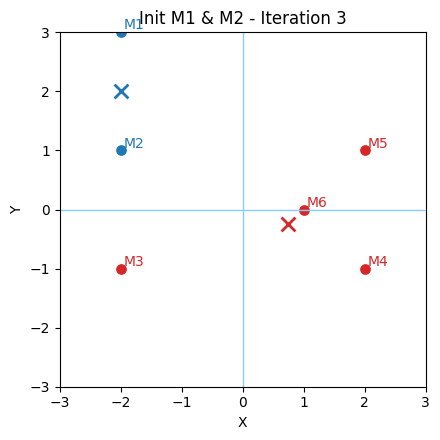


=== Cas B : init M4 et M6 ===
Iteration 1
Centroid [2, -1] Points [[2, -1]]
Centroid [1, 0] Points [[-2, 3], [-2, 1], [-2, -1], [2, 1], [1, 0]]
Iteration 2
Centroid [2, -1] Points [[2, -1], [2, 1], [1, 0]]
Centroid [-0.6, 0.8] Points [[-2, 3], [-2, 1], [-2, -1]]
Iteration 3
Centroid [1.666666667, 0] Points [[2, -1], [2, 1], [1, 0]]
Centroid [-2, 1] Points [[-2, 3], [-2, 1], [-2, -1]]
Fin clustering, erreur = 10.666666666666666


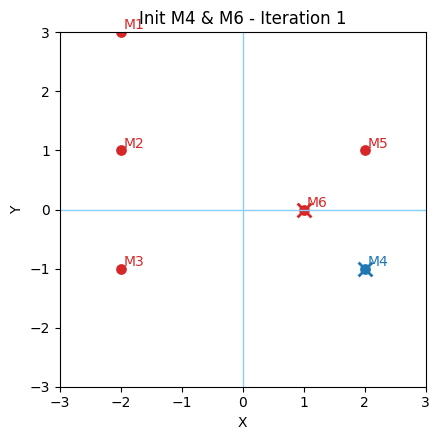

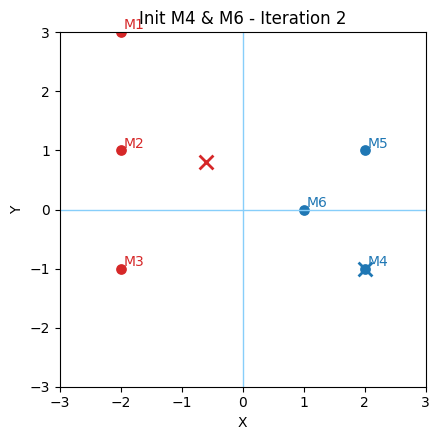

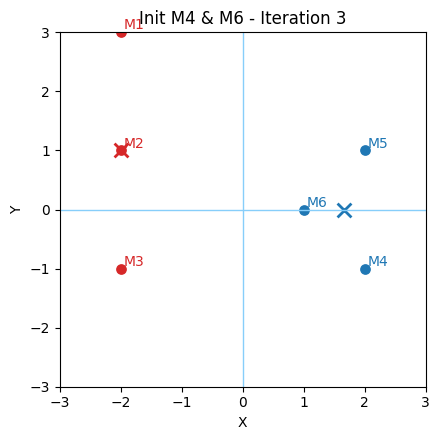


SSE A (M1,M2): 15.5
SSE B (M4,M6): 10.666666666666666


In [25]:

# ===========================
#   3) Données + Lancements
# ===========================

# Jeu de données 2D (dans l'ordre M1..M6)
names = ["M1", "M2", "M3", "M4", "M5", "M6"]
data2d = [
    [-2,  3],  # M1
    [-2,  1],  # M2
    [-2, -1],  # M3
    [ 2, -1],  # M4
    [ 2,  1],  # M5
    [ 1,  0],  # M6
]

# (A) Centroides initiaux : M1 et M2
init_A = [data2d[0], data2d[1]]  # M1, M2
print("=== Cas A : init M1 et M2 ===")
sse_A, hist_A = kmeans_with_history(data2d, k=2, init_centroids=init_A, tol=0.0, verbose=True)
plot_sequence_2d(data2d, names, hist_A, title_prefix="Init M1 & M2", xlim=(-3,3), ylim=(-3,3))

# (B) Centroides initiaux : M4 et M6
init_B = [data2d[3], data2d[5]]  # M4, M6
print("\n=== Cas B : init M4 et M6 ===")
sse_B, hist_B = kmeans_with_history(data2d, k=2, init_centroids=init_B, tol=0.0, verbose=True)
plot_sequence_2d(data2d, names, hist_B, title_prefix="Init M4 & M6", xlim=(-3,3), ylim=(-3,3))

print("\nSSE A (M1,M2):", sse_A)
print("SSE B (M4,M6):", sse_B)




La fonction `kmeans_with_history` a été améliorée pour **enregistrer l’historique des affectations et des centroïdes**, ce qui permet de générer des figures 2D à chaque itération.

**Paramètres optionnels ajoutés :**

* `names` : noms des points pour les annoter.
* `title_prefix`, `xlim`, `ylim`, `show_axes_zero` : pour personnaliser l’affichage des figures.

**Reproduction des figures :**

1. Exécuter `kmeans_with_history` avec les centroïdes initiaux.
2. Passer l’historique à `plot_sequence_2d`.
3. Chaque figure montre les points (`•`) annotés, les centroïdes (`×`) et chaque cluster avec une couleur différente.

**Tests réalisés :**

* Init M1 et M2 → succession de figures montrant la formation des clusters.
* Init M4 et M6 → idem pour un autre choix de centroïdes.

---


### Exercice 4

In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.cluster import KMeans
from numpy import array

data1 = [[1], [2], [18], [20], [31]]

# Caso 1: init [[1],[2],[18]]
kmeans1 = KMeans(n_clusters=3, n_init=1, init=array([[1], [2], [18]])).fit(data1)
print("Labels:", kmeans1.labels_)
print("SSE (inertia):", kmeans1.inertia_)

# Caso 2: init [[18],[20],[31]]
kmeans2 = KMeans(n_clusters=3, n_init=1, init=array([[18], [20], [31]])).fit(data1)
print("Labels:", kmeans2.labels_)
print("SSE (inertia):", kmeans2.inertia_)



Labels: [0 1 2 2 2]
SSE (inertia): 98.00000000000003
Labels: [0 0 1 1 2]
SSE (inertia): 2.5


In [28]:
from sklearn.cluster import KMeans
from numpy import array

# Dataset Ex.2
data2 = array([[2], [4], [6], [12], [24], [30]])

def show_clusters_1d(labels, data):
    # Regroupe les points par label et les affiche
    groups = {}
    for pt, lab in zip(data.tolist(), labels.tolist()):
        groups.setdefault(lab, []).append(pt)
    return {lab: groups[lab] for lab in sorted(groups)}

# (a) init [[2],[6]]
km_a = KMeans(n_clusters=2, n_init=1, init=array([[2],[6]])).fit(data2)
print("Ex2 (a) labels:", km_a.labels_.tolist())
print("Ex2 (a) SSE (inertia):", km_a.inertia_)
print("Ex2 (a) clusters:", show_clusters_1d(km_a.labels_, data2))

# (b) init [[12],[24]]
km_b = KMeans(n_clusters=2, n_init=1, init=array([[12],[24]])).fit(data2)
print("Ex2 (b) labels:", km_b.labels_.tolist())
print("Ex2 (b) SSE (inertia):", km_b.inertia_)
print("Ex2 (b) clusters:", show_clusters_1d(km_b.labels_, data2))


Ex2 (a) labels: [0, 0, 0, 0, 1, 1]
Ex2 (a) SSE (inertia): 74.0
Ex2 (a) clusters: {0: [[2], [4], [6], [12]], 1: [[24], [30]]}
Ex2 (b) labels: [0, 0, 0, 0, 1, 1]
Ex2 (b) SSE (inertia): 74.0
Ex2 (b) clusters: {0: [[2], [4], [6], [12]], 1: [[24], [30]]}


L’implémentation manuelle de `K-means` permet de voir comment les clusters et les centroïdes évoluent itérativement, tandis que SciKit-Learn effectue **exactement les mêmes calculs de manière optimisée** et renvoie directement les clusters et SSE. 

En utilisant les mêmes centroïdes initiaux, **les deux méthodes produisent les mêmes clusters.**

In [29]:
from sklearn.cluster import KMeans
from numpy import array

# Points 2D dans l’ordre M1..M6
names = ["M1","M2","M3","M4","M5","M6"]
data2d = array([
    [-2,  3],  # M1
    [-2,  1],  # M2
    [-2, -1],  # M3
    [ 2, -1],  # M4
    [ 2,  1],  # M5
    [ 1,  0],  # M6
])

def clusters_named(labels, names):
    groups = {}
    for nm, lab in zip(names, labels.tolist()):
        groups.setdefault(lab, []).append(nm)
    # ordena por etiqueta para lectura; recuerda que el número de etiqueta puede permutar
    return {lab: sorted(groups[lab]) for lab in sorted(groups)}

# (A) init M1 & M2
init_A = array([data2d[0], data2d[1]])  # M1, M2
km_A = KMeans(n_clusters=2, n_init=1, init=init_A).fit(data2d)
print("Ex3 (A) labels:", km_A.labels_.tolist())
print("Ex3 (A) SSE (inertia):", km_A.inertia_)
print("Ex3 (A) clusters (par noms):", clusters_named(km_A.labels_, names))

# (B) init M4 & M6
init_B = array([data2d[3], data2d[5]])  # M4, M6
km_B = KMeans(n_clusters=2, n_init=1, init=init_B).fit(data2d)
print("Ex3 (B) labels:", km_B.labels_.tolist())
print("Ex3 (B) SSE (inertia):", km_B.inertia_)
print("Ex3 (B) clusters (par noms):", clusters_named(km_B.labels_, names))


Ex3 (A) labels: [0, 0, 1, 1, 1, 1]
Ex3 (A) SSE (inertia): 15.5
Ex3 (A) clusters (par noms): {0: ['M1', 'M2'], 1: ['M3', 'M4', 'M5', 'M6']}
Ex3 (B) labels: [1, 1, 1, 0, 0, 0]
Ex3 (B) SSE (inertia): 10.666666666666666
Ex3 (B) clusters (par noms): {0: ['M4', 'M5', 'M6'], 1: ['M1', 'M2', 'M3']}


Pour confirmer que l’implémentation manuelle fonctionne correctement, les clusters des exercices 2 et 3 ont été réalisés en utilisant la fonction `KMeans` de SciKit-Learn avec les mêmes centroïdes initiaux. 

Les résultats obtenus sont **identiques** à ceux produits par le code, ce qui confirme que l'algorithme implémente correctement le `K-means.` 

Cette vérification montre que SciKit-Learn effectue les mêmes calculs de manière optimisée et que l'implémentation manuelle est fidèle à l’algorithme classique.

---

## 2. Clustering hiérarchique

In [30]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [31]:
data = [0.1, 0.9, 0.35, 0.8, 0.3, 0.4, 0.5, 0.6, 0.7, 0.2]

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

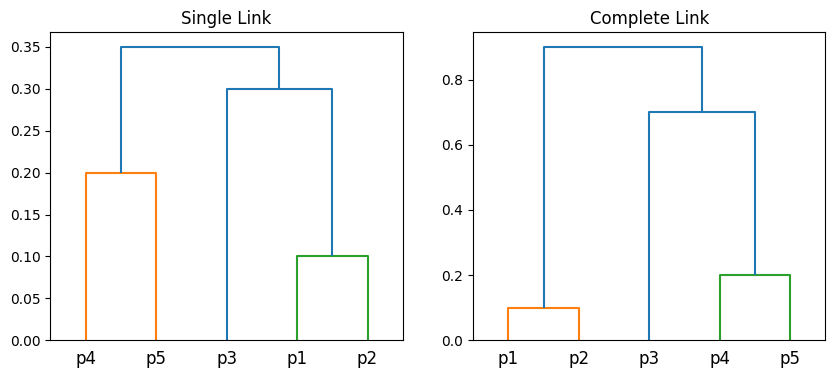

In [33]:
plt.figure(figsize=(10, 4))

# Single Linkage
plt.subplot(1, 2, 1)
Z_single = linkage(data, method='single')
dendrogram(Z_single, labels=['p1', 'p2', 'p3', 'p4', 'p5'])
plt.title("Single Link")

# Complete Linkage
plt.subplot(1, 2, 2)
Z_complete = linkage(data, method='complete')
dendrogram(Z_complete, labels=['p1', 'p2', 'p3', 'p4', 'p5'])
plt.title("Complete Link")

plt.show()


|    |  p1  |  p2  |  p3  |  p4  |  p5  |
| -- |  --- |  --- |  --- |  --- |  --- |
| p1 | 1.00 | 0.10 | 0.41 | 0.55 | 0.35 |
| p2 | 0.10 | 1.00 | 0.64 | 0.47 | 0.98 |
| p3 | 0.41 | 0.64 | 1.00 | 0.44 | 0.85 |
| p4 | 0.55 | 0.47 | 0.44 | 1.00 | 0.76 |
| p5 | 0.35 | 0.98 | 0.85 | 0.76 | 1.00 |


distance(p_i, p_j) = 1 - similarity(p_i, p_j)

In [34]:
similarity = [0.10, 0.41, 0.55, 0.35, 0.64, 0.47, 0.98, 0.44, 0.85, 0.76]
distance = [1 - s for s in similarity]

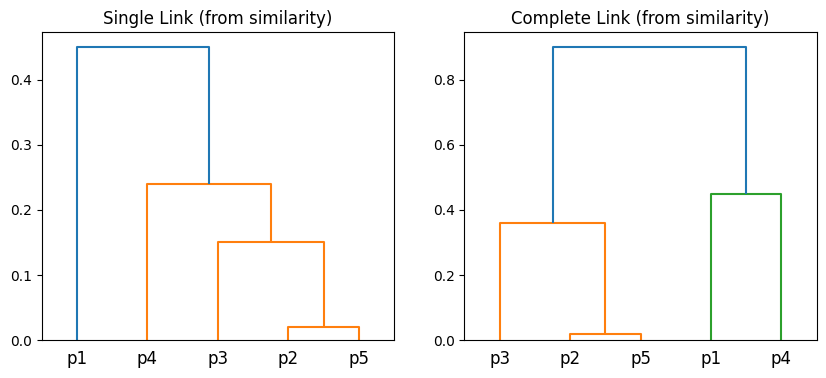

In [35]:
# Single Link
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
Z_single = linkage(distance, method='single')
dendrogram(Z_single, labels=['p1','p2','p3','p4','p5'])
plt.title("Single Link (from similarity)")

# Complete Link
plt.subplot(1, 2, 2)
Z_complete = linkage(distance, method='complete')
dendrogram(Z_complete, labels=['p1','p2','p3','p4','p5'])
plt.title("Complete Link (from similarity)")

plt.show()


## 3. Etude de cas

### Préparation et PCA

Exemple de data_reduced : [[np.float64(2.9130245873965883), np.float64(-0.09562057550551105)], [np.float64(-0.4299113299319387), np.float64(0.5881556664216977)], [np.float64(0.2852250773700539), np.float64(0.4551744133397668)], [np.float64(2.932422654229275), np.float64(-1.6955550705215485)], [np.float64(-1.0335758664708328), np.float64(-0.13665870884235187)]]


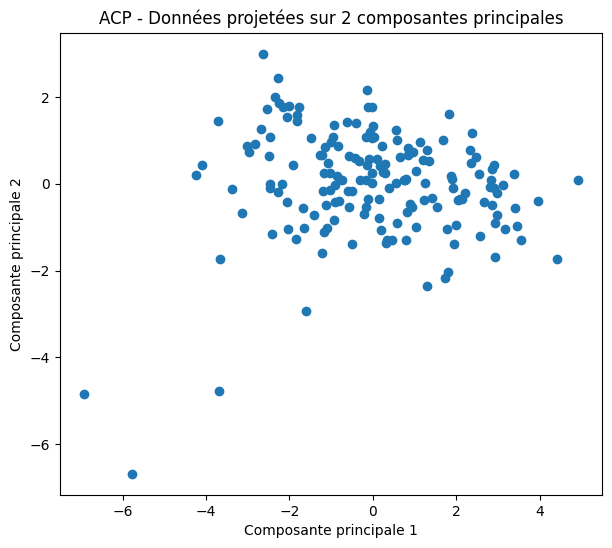

In [36]:
import csv
from numpy import array, identity, transpose, matmul, std, mean
from numpy.linalg import eig
import matplotlib.pyplot as plt

# TODO code pour lire data_country à partir du fichier Country-data.csv
countries = []
data_country = []

with open("Country-data.csv", "r") as f:
    reader = csv.reader(f)
    next(reader)  # ignorer l’en-tête
    for row in reader:
        countries.append(row[0])
        data_country.append(list(map(float, row[1:])))  # convertir les 9 colonnes à float

# Les mêmes données de la matrice data_country, dans le format "array" exploitable pour la suite
X = array(data_country)

# Le nombre de points
n = len(countries)

# Le nombre de variables
p = len(data_country[0])

# La matrice des données centrées, c’est-à-dire la somme = 0 sur chaque colonne
Y = X - matmul(transpose(array([n * [1]])), transpose(array([[mean(variable)] for variable in transpose(X)])))

# La matrice des données centrées et réduites, qui en plus a l’écart type constant = 1 sur chaque colonne
Z = matmul(Y, array(list(map(lambda variable: [1. / std(variable)], transpose(X)))) * identity(p))

# La matrice (symétrique) de variance/covariance des données centrées réduites
R = matmul(matmul(transpose(Z), 1. / n * identity(n)), Z)

# Les vecteurs propres de R
eigenvectors = eig(R)[1]

# Les 2 composantes principales = 2 nouvelles variables contenant le plus d’information possible des 9 variables initiales
components = [matmul(Z, eigenvectors[:, 0]), matmul(Z, eigenvectors[:, 1])]

# La matrice initiale, projetée sur 2 nouvelles colonnes qui représentent les 2 composantes principales
data_reduced = [[components[0][i], components[1][i]] for i in range(n)]

print("Exemple de data_reduced :", data_reduced[:5])

# Visualisation ACP
plt.figure(figsize=(7, 6))
plt.scatter([x[0] for x in data_reduced], [x[1] for x in data_reduced])
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("ACP - Données projetées sur 2 composantes principales")
plt.show()


### Clustering K-Means

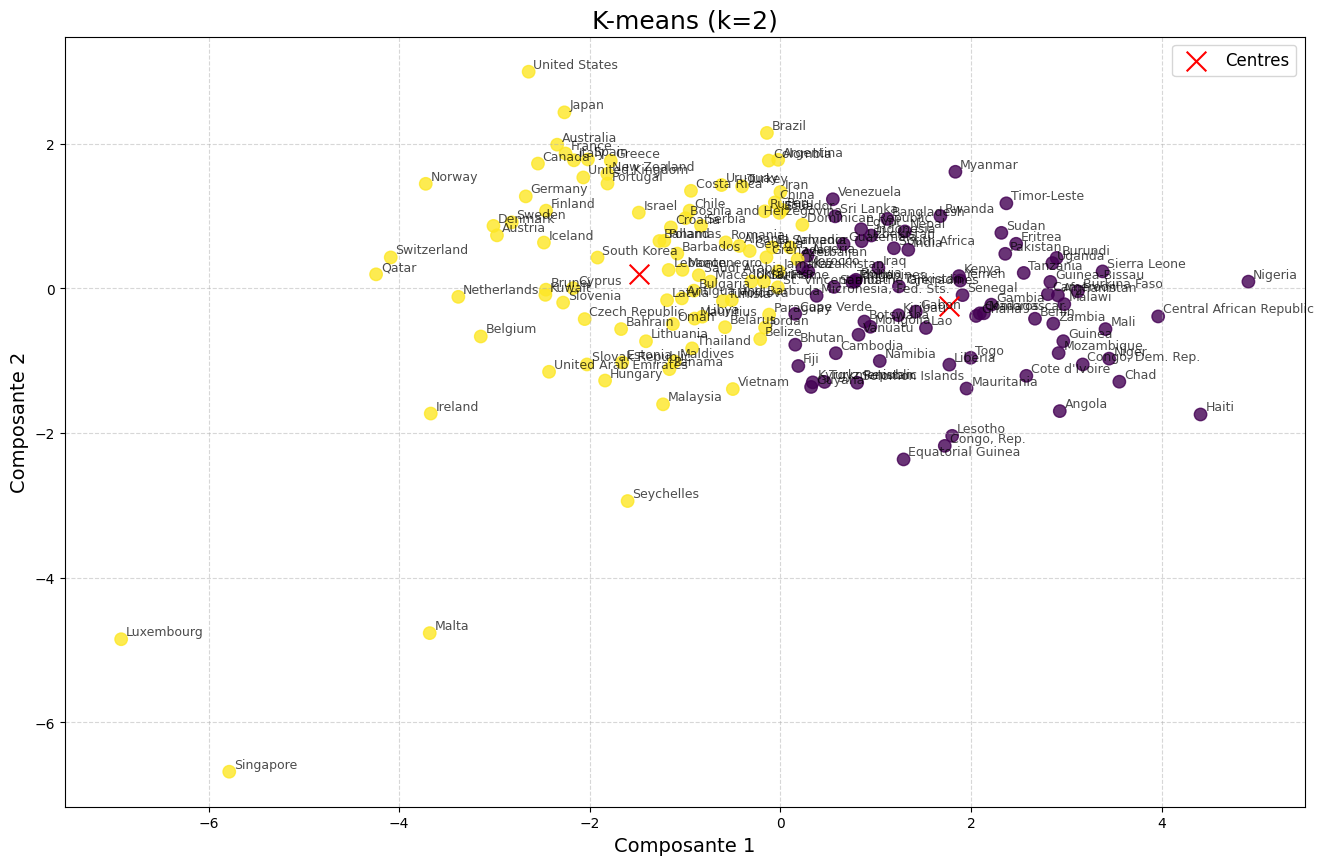

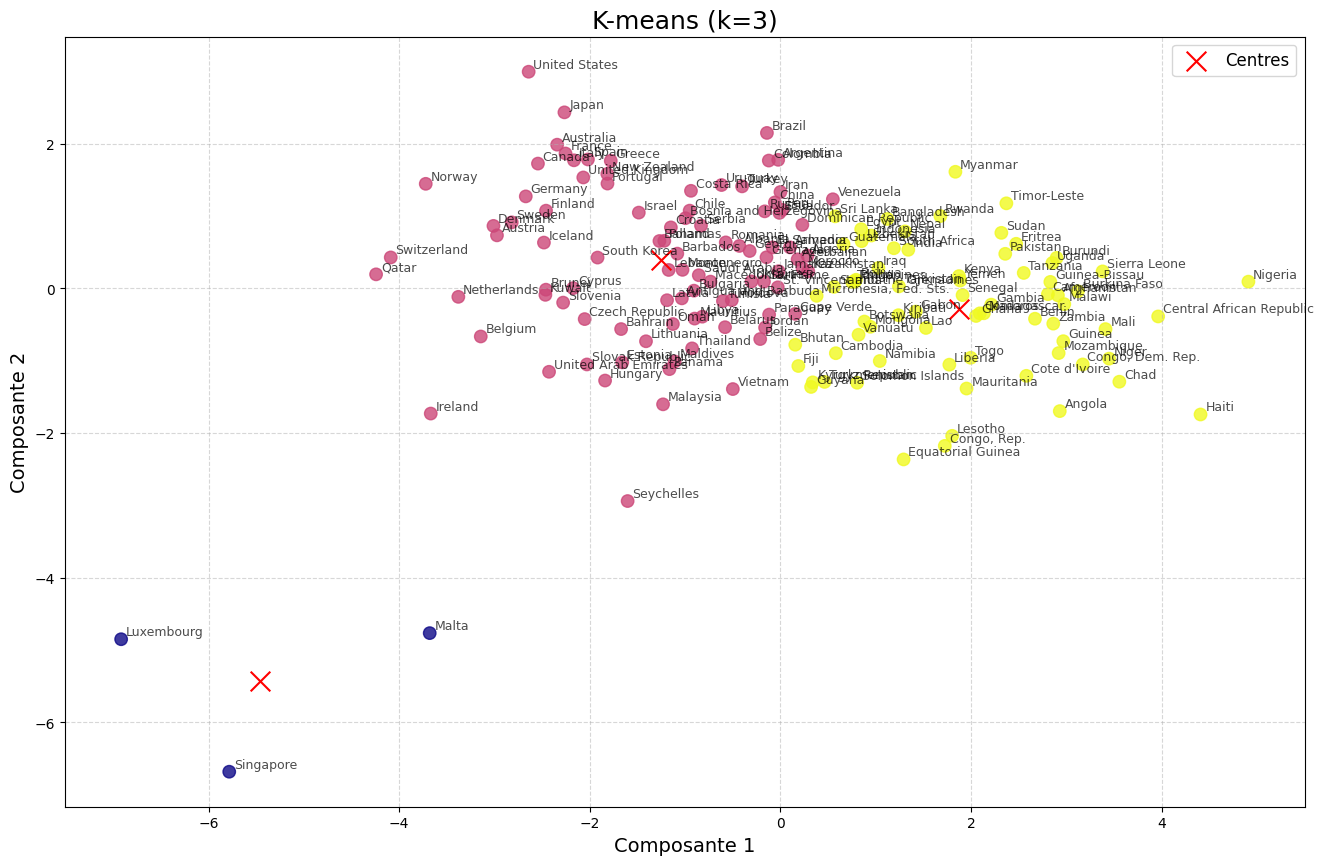

In [37]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# On travaille sur les données réduites à 2 dimensions
data_2D = np.array(data_reduced)

# === K-Means avec k = 2 ===
kmeans2 = KMeans(n_clusters=2, n_init=10, random_state=0)
labels2 = kmeans2.fit_predict(data_2D)

plt.figure(figsize=(16, 10))  # ← figura mucho más grande
plt.scatter(data_2D[:, 0], data_2D[:, 1], c=labels2, cmap="viridis", s=80, alpha=0.8)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],
            c="red", marker="x", s=200, label="Centres")
plt.xlabel("Composante 1", fontsize=14)
plt.ylabel("Composante 2", fontsize=14)
plt.title("K-means (k=2)", fontsize=18)
plt.legend(fontsize=12)

# Ajouter les noms des pays avec un décalage
for i, country in enumerate(countries):
    plt.text(data_2D[i, 0] + 0.05, data_2D[i, 1] + 0.05, country, fontsize=9, alpha=0.7)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# === K-Means avec k = 3 ===
kmeans3 = KMeans(n_clusters=3, n_init=10, random_state=0)
labels3 = kmeans3.fit_predict(data_2D)

plt.figure(figsize=(16, 10))
plt.scatter(data_2D[:, 0], data_2D[:, 1], c=labels3, cmap="plasma", s=80, alpha=0.8)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1],
            c="red", marker="x", s=200, label="Centres")
plt.xlabel("Composante 1", fontsize=14)
plt.ylabel("Composante 2", fontsize=14)
plt.title("K-means (k=3)", fontsize=18)
plt.legend(fontsize=12)

# Ajouter les noms des pays
for i, country in enumerate(countries):
    plt.text(data_2D[i, 0] + 0.05, data_2D[i, 1] + 0.05, country, fontsize=9, alpha=0.7)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Clustering hiérarchique

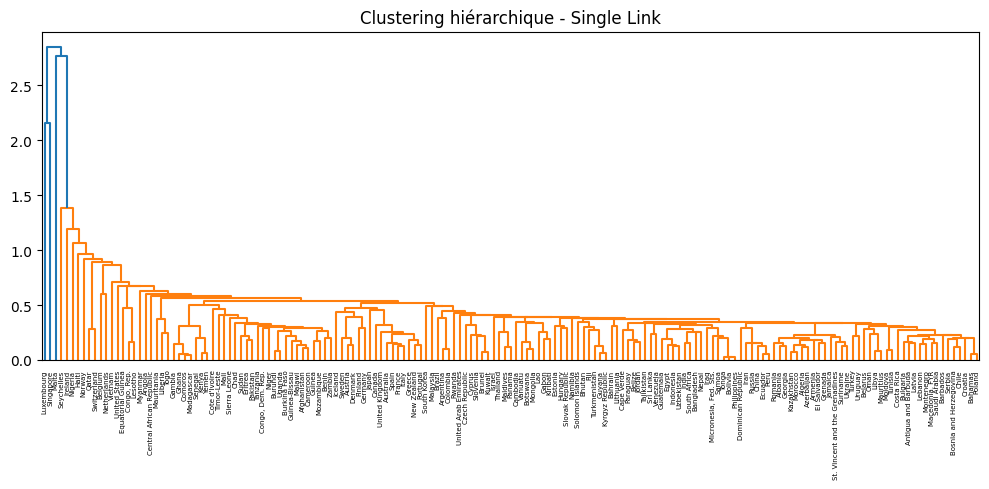

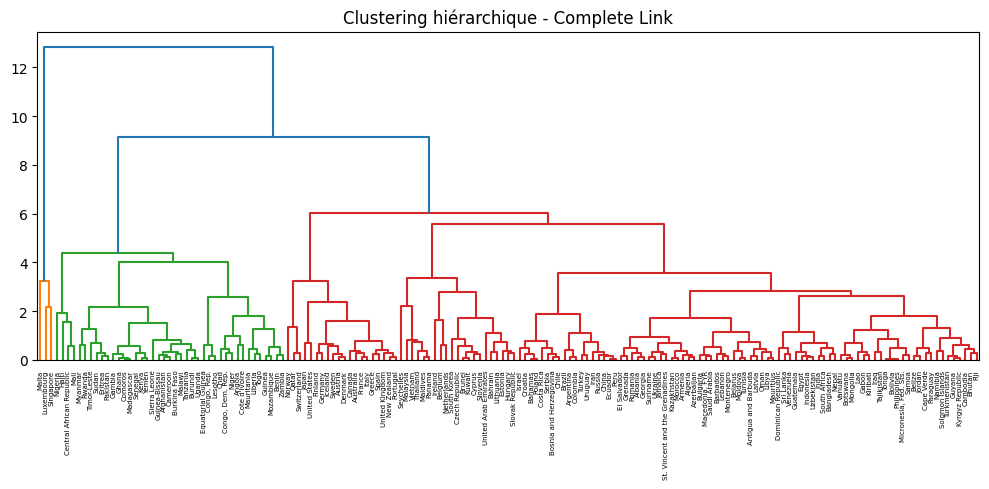

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Méthode single link
linkage_single = linkage(data_2D, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_single, labels=countries, leaf_rotation=90)
plt.title("Clustering hiérarchique - Single Link")
plt.tight_layout()
plt.show()

# Méthode complete link
linkage_complete = linkage(data_2D, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_complete, labels=countries, leaf_rotation=90)
plt.title("Clustering hiérarchique - Complete Link")
plt.tight_layout()
plt.show()


🔹 K-Means

Avec k = 2, on observe deux grands groupes bien distincts :
le premier regroupe les pays développés (États-Unis, France, Allemagne, Japon, Australie, etc.), caractérisés par un PIB élevé, une faible mortalité et de bons indicateurs de santé.
Le second rassemble les pays en développement (Nigéria, Angola, Burundi, Haïti…), souvent marqués par un faible revenu et des conditions sanitaires plus précaires.
Cette séparation reflète clairement la division économique mondiale entre le “Nord” et le “Sud”.

Avec k = 3, un troisième groupe apparaît, formé de micro-économies très riches comme Luxembourg, Singapour ou Malte, qui se distinguent fortement des autres pays.
Les deux autres clusters restent similaires : les pays industrialisés et ceux en développement.
Cette classification donne une vision plus nuancée, en faisant apparaître un groupe intermédiaire de pays émergents (Brésil, Chine, Afrique du Sud…).

Il est possible que des centroïdes initiaux différents modifient légèrement la frontière entre certains pays, mais la structure générale des clusters resterait la même : pays développés, émergents et en développement.

🔹 Clustering hiérarchique

Le lien simple (single link) a tendance à créer des chaînes longues et peu équilibrées : les pays se rassemblent progressivement sans frontières nettes entre les groupes.
Le lien complet (complete link), au contraire, forme des clusters plus compacts et cohérents, où les pays sont mieux séparés selon leur niveau de développement.
Dans l’ensemble, les regroupements obtenus sont logiques et confirment les résultats du K-Means :
on retrouve bien trois grandes catégories, pays développés, émergents et en développement.